In [16]:
import feather
import matplotlib.pyplot as plt
import numpy as np
import functools
import cmocean

def plot_depth_slice(df,d,ax):
    x = df['x'].unique()
    y = df['y'].unique()
    z = df['z'].unique()[d]
    xx,yy =np.meshgrid(x,y)
    zeta = np.array(df.loc[df['z']==z]['d'])
    zeta = np.reshape(zeta,(len(x),len(y)))
    p = ax.contourf(xx/1000,yy/1000,zeta,20,cmap=cmocean.cm.thermal)
    ax.set_xlabel("Latitude (km)")
    ax.set_ylabel("Longitude (km)")
    return(p)
    
def plot_lon_slice(df,d,ax):
    x = df['x'].unique()
    z = df['z'].unique()
    y = df['y'].unique()[d]
    xx,zz =np.meshgrid(x,z)
    zeta = np.array(df.loc[df['y']==y]['d'])
    zeta = np.reshape(zeta,(len(x),len(z)))
    #ax.invert_yaxis()
    p = ax.contourf(xx/1000,zz/1000,zeta,20,cmap=cmocean.cm.thermal)
    ax.set_xlabel("Latitude (km)")
    ax.set_ylabel("Depth (km)")
    return p

def plot_lat_slice(df,d,ax):
    y = df['y'].unique()
    z = df['z'].unique()
    x = df['x'].unique()[d]
    yy,zz =np.meshgrid(y,z)
    zeta = np.array(df.loc[df['x']==x]['d'])
    zeta = np.reshape(zeta,(len(y),len(z)))
    #ax.invert_yaxis()
    p = ax.contourf(yy/1000,zz/1000,zeta,20,cmap=cmocean.cm.thermal)
    ax.set_xlabel("Longitude (km)")
    ax.set_ylabel("Depth (km)")
    return p


def plot_sound_slice(df,d,ax):
    x = df['x'].unique()
    z = df['z'].unique()
    y = df['y'].unique()[d]
    xx,zz =np.meshgrid(x,z)
    zeta = np.array(df.loc[df['y']==y]['d'])
    zeta = np.reshape(zeta,(len(x),len(z)))
    #c =  (cs(z) +  zeta.transpose()*dc(z)).transpose()
    c =   (zeta.transpose()*dc(z)).transpose()
    p = ax.contourf(xx/1000,zz/1000,c,50)
    ax.set_xlabel("Latitude (km)")
    ax.set_ylabel("Depth (km)")
    return p
 
def make_animation(files):
    fig, ax = plt.subplots()
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    set_animation_attributes(fig,ax) 
    
    #First Frame
    df = feather.read_dataframe(files[0])
    p = plot_sound_slice(df,0,ax)
    
    #Init and update function
    init = functools.partial(init_animation,fig,ax,p,cbar_ax)
    update = functools.partial(update_animation,fig,ax,cbar_ax)
   
    #Compile Animation
    print("Creating Animation it may take awhile")
    ani = FuncAnimation(fig, update, frames=files[1:],init_func=init, blit=False)
    path = 'animation.mp4'
    ani.save(path)
    return ani

def set_animation_attributes(fig,ax):
    ax.invert_yaxis()
    ax.set_xlabel('Range Km')
    ax.set_ylabel('Depth Km')
    
def init_animation(fig,ax,p,cbar_ax):
    fig.subplots_adjust(right=0.8)
    cbar = fig.colorbar(p, cax=cbar_ax)
    cbar.set_label('Sound Speed Anom. (m/s)')
    fig.set_dpi(300)
    return p

def update_animation(fig,ax,cbar_ax,frame):
    
    df = feather.read_dataframe(frame)
    ax.set_title('%.2f hours' % (df['t'][0]/3600.0))
    
    p = plot_sound_slice(df,0,ax)
    cbar_ax.cla()
    fig.colorbar(p, cax=cbar_ax)
    return p

#Average depth described by munk profile
def zbar (z):
    return 2*(z-1300)/1300

#Munk sound depth profile
def cs ( z ):
    cbar = 1450
    epi = 0.00737
    return cbar*(1 + epi*(zbar(z)- 1 + np.exp(-zbar(z))))

def dc(z):
    cbar = 1500
    epi = 0.00737
    return cbar*(2/1300)*epi*( 1 - np.exp(-zbar(z)) )


In [17]:
#%run ../scripts/simulate.py ../config/examples/plot_example.json

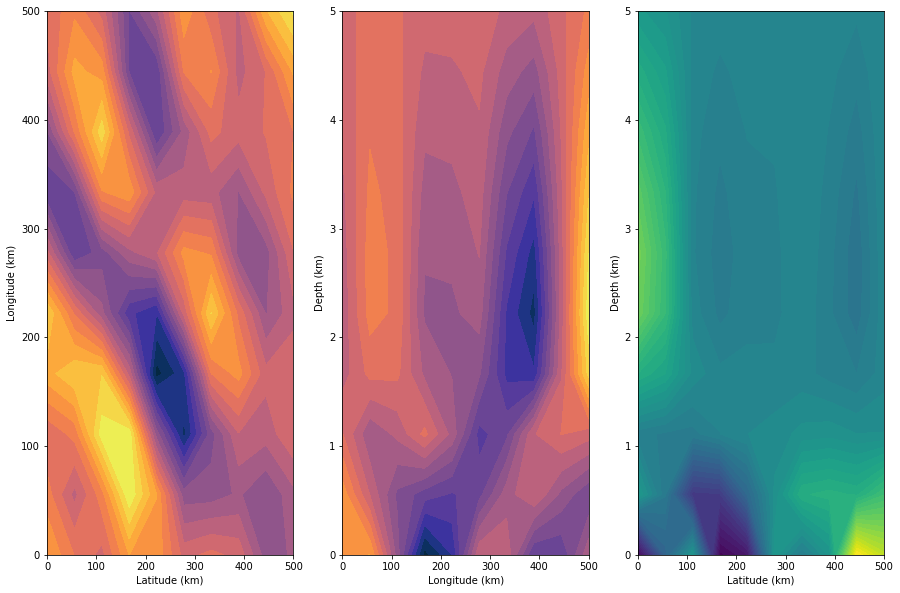

In [30]:
%matplotlib inline
df = feather.read_dataframe('../data/plotexample/run-101.fthr')
f, (ax1,ax2,ax3) = plt.subplots(1,3)
plot_depth_slice(df,0,ax1)
plot_lat_slice(df,4,ax2)
plot_sound_slice(df,0,ax3)
f.set_size_inches(15,10)


In [33]:
  np.sqrt( (( df['d'] )**2 ).mean() )

1.8605032436209834

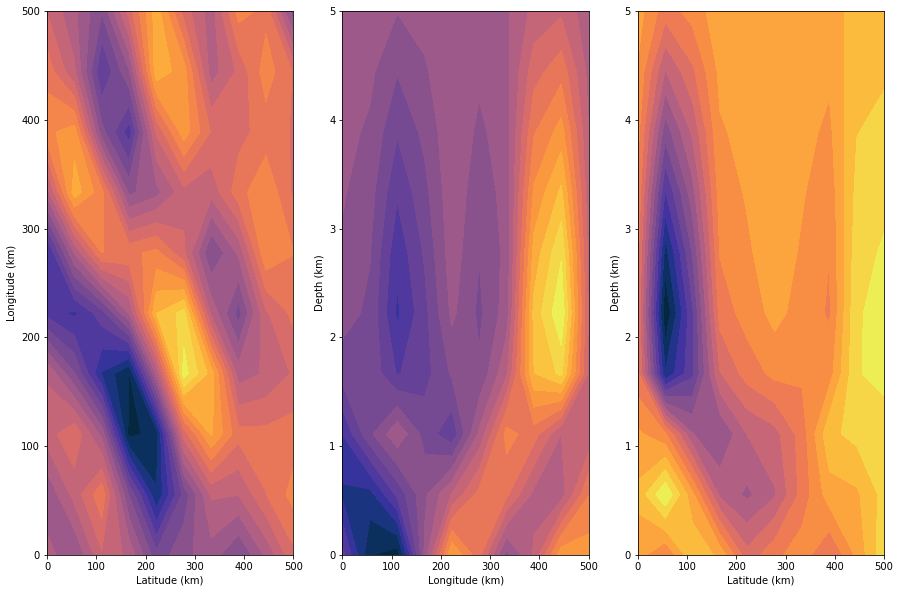

In [19]:
%matplotlib inline
df = feather.read_dataframe('../data/plotexample/run-334.fthr')
f, (ax1,ax2,ax3) = plt.subplots(1,3)
plot_depth_slice(df,0,ax1)
plot_lat_slice(df,4,ax2)
plot_lon_slice(df,0,ax3)
f.set_size_inches(15,10)


Text(0, 0.5, 'Depth m')

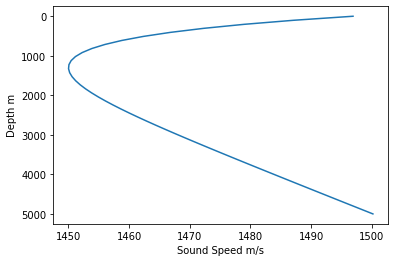

In [24]:
z = np.linspace(0,5000)
plt.gca().invert_yaxis()
plt.plot(cs(z),z)
plt.xlabel('Sound Speed m/s')
plt.ylabel('Depth m')
#plt.plot(c(z),z)

Creating Animation it may take awhile


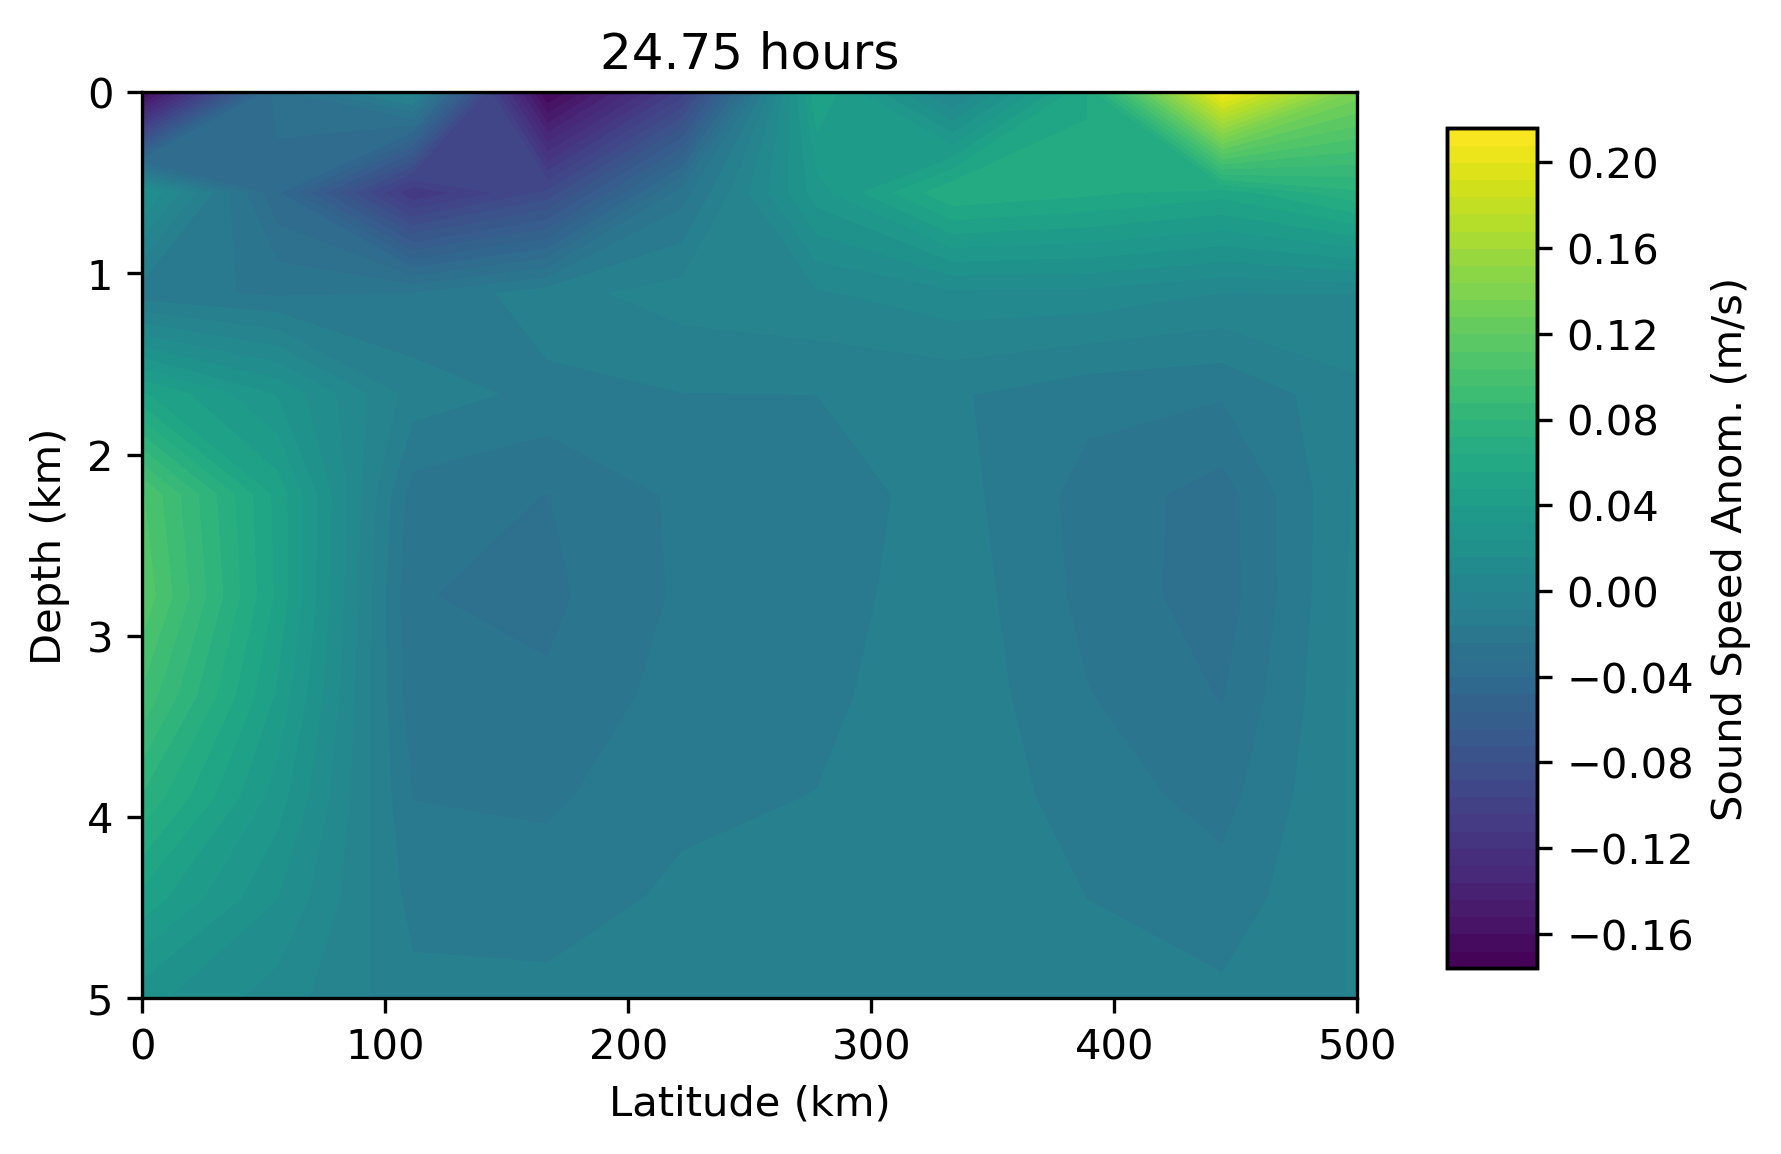

In [21]:
import glob
import matplotlib.pyplot as plt
import functools
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

files = glob.glob("../data/plotexample/run*")
def last_4chars(x):
    return(x[-8:])

files = sorted(files, key = last_4chars)   
files = files[:100]

ani = make_animation(files)
HTML( ani.to_html5_video() )

In [22]:
v1 = np.array([1,2])
v2 = np.array([[1,2],[3,4]])
v0 = np.array([1,2])

v3 = v2.transpose()*v1 + v0
v3.transpose()

array([[ 2,  3],
       [ 8, 10]])

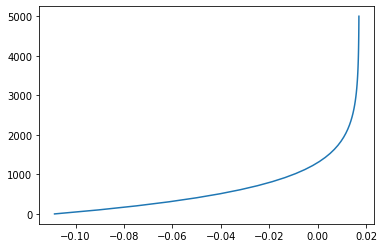

In [23]:
z = np.linspace(0,5000)
plt.plot(dc(z),z)

In [27]:
df['d'].mean()

0.0822531430911588